### The next notebook was token from:  
https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%204.ipynb

### 1. Loading dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing, neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
defaults = pd.read_excel('../../data/Default.xlsx')

In [10]:
defaults.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [15]:
defaults.shape

(10000, 6)

In [13]:
# Factorize categorical variables in numerical variables
defaults['default2'] = defaults.default.factorize()[0]
defaults['student2'] = defaults.student.factorize()[0]
defaults.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


In [17]:
defaults.corr()

,balance,income,default2,student2
balance,1.000000,-0.152243,0.350119,0.203578
income,-0.152243,1.000000,-0.019871,-0.753985
default2,0.350119,-0.019871,1.000000,0.035420
student2,0.203578,-0.753985,0.035420,1.000000


/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


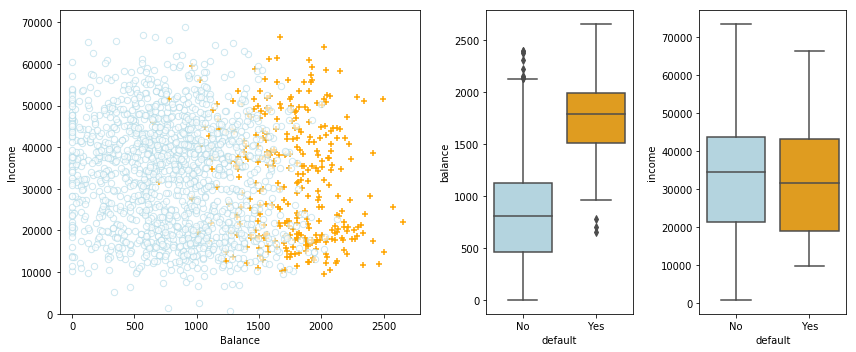

In [23]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = defaults[defaults.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = defaults[defaults.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=defaults, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=defaults, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())


### 2. Logistic regression